#### Compition Link : https://www.kaggle.com/competitions/spaceship-titanic/data?select=train.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### There are many missing values 

In [4]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Let's focus on continous Variables bcz we are dealing with discretization and binning 

In [6]:
### here we get details of all continuous variables 
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
num_features=df.describe().columns.tolist()
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [16]:
for col in num_features:
    print(col , "No of unique features:", len(df[col].unique()))
    print(df[col].unique())

Age No of unique features: 81
[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
RoomService No of unique features: 1274
[   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt No of unique features: 1508
[   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall No of unique features: 1116
[   0.   25.  371. ... 1085.  510. 1872.]
Spa No of unique features: 1328
[   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck No of unique features: 1307
[   0.   44.   49. ... 1164.  971. 3235.]


In [22]:
y = pd.get_dummies(df['Transported'], drop_first=True)

In [24]:
y.head()

,True
0,0
1,1
2,0
3,0
4,1


## Train test split 

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(df[num_features],y,train_size=0.7, random_state=2)

### Let's fill the null values with median 

In [26]:
x_train.isnull().sum()

Age             125
RoomService     123
FoodCourt       136
ShoppingMall    149
Spa             123
VRDeck          131
dtype: int64

In [27]:
x_test.isnull().sum()

Age             54
RoomService     58
FoodCourt       47
ShoppingMall    59
Spa             60
VRDeck          57
dtype: int64

In [28]:
x_train.fillna(x_train.median(), inplace=True)
x_test.fillna(x_train.median(), inplace=True)

In [29]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 5897 to 6312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2608 non-null   float64
 1   RoomService   2608 non-null   float64
 2   FoodCourt     2608 non-null   float64
 3   ShoppingMall  2608 non-null   float64
 4   Spa           2608 non-null   float64
 5   VRDeck        2608 non-null   float64
dtypes: float64(6)
memory usage: 142.6 KB


## Let's apply Decison tree without transformation 

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
pred = dtc.predict(x_test)
accuracy_score(y_test,pred)

0.75

In [46]:
X = df[num_features].copy()
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


### Let's now transform the column using Different methods of Discretization
- equal width
- equal frequency
- kmean clustering 

#### import libraries and classes 

In [47]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

## let's visiualize the distribution 

In [50]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


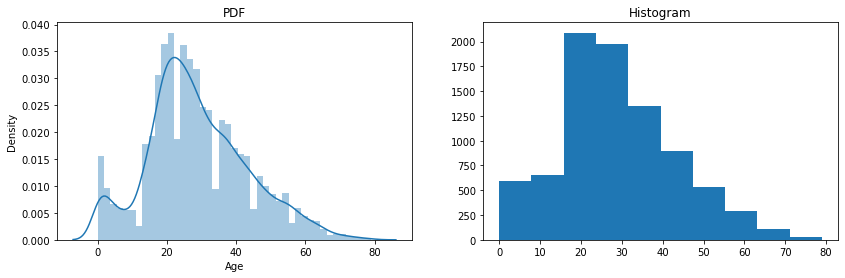

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


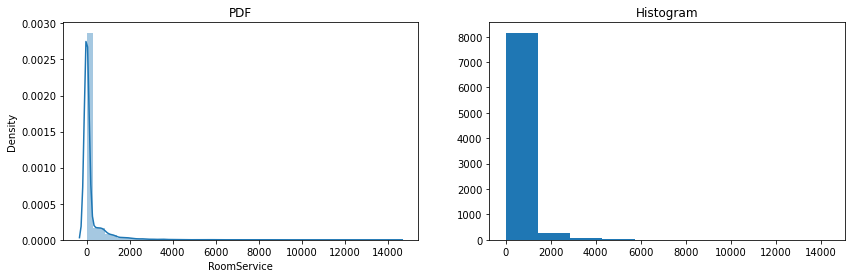

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


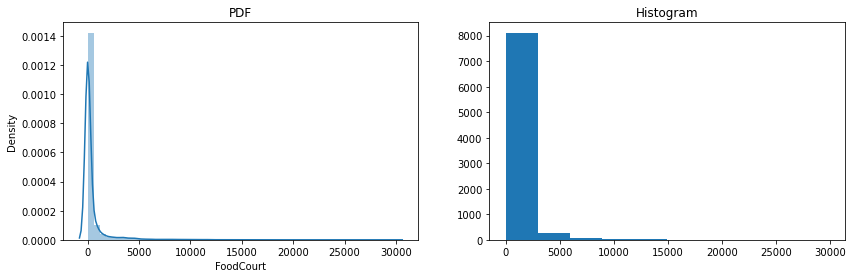

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


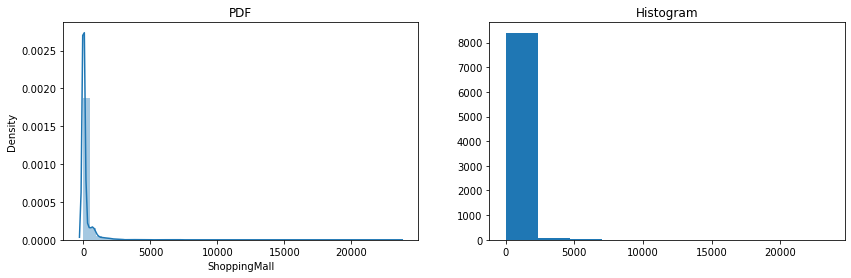

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


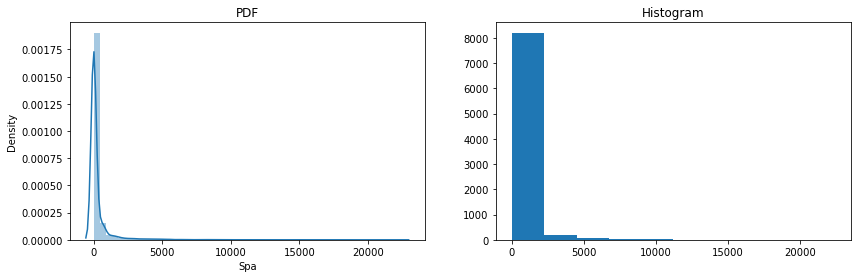

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


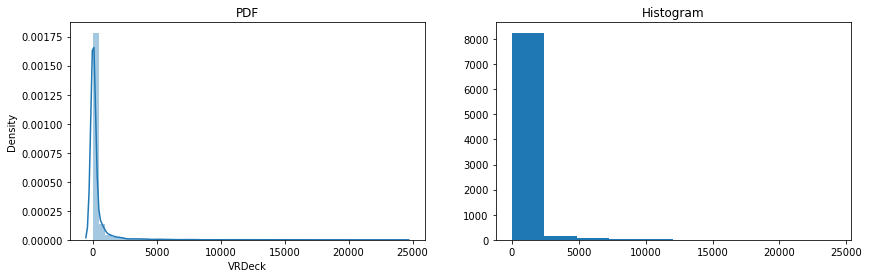

In [54]:
for col in num_features:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title('PDF')

    plt.subplot(122)
    plt.hist(df[col])
    plt.title('Histogram')

    plt.show()

In [60]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_roomService = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_foodCourt =  KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_spa = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_VRDeck = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_shoppingMall =  KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [62]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_roomService,[1]),
    ('thirs', kbin_foodCourt, [2]),
    ('fourt',kbin_shoppingMall,[3]),
    ('five',kbin_spa,[4]),
    ('six', kbin_VRDeck, [5]),
])

In [63]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discre

## This gives us the values of the each bin 

In [70]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.,  7., 15., 18., 20., 22., 24., 26., 27., 30., 33., 36., 40.,
              45., 53., 79.])                                                 ],
      dtype=object)

In [71]:
len(trf.named_transformers_['first'].bin_edges_[0])

16

### Now let's train the model again

In [74]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [75]:
accuracy_score(y_test,y_pred2)

0.74079754601227

In [79]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    kbin_roomService = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    kbin_foodCourt =  KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    kbin_spa = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    kbin_VRDeck = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    kbin_shoppingMall =  KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    
    trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_roomService,[1]),
    ('thirs', kbin_foodCourt, [2]),
    ('fourt',kbin_shoppingMall,[3]),
    ('five',kbin_spa,[4]),
    ('six', kbin_VRDeck, [5]),
    ])
    
    X_trf = trf.fit_transform(x_train)
    #print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['RoomService'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Room Service")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['FoodCourt'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,2],color='red')
    plt.title("Food Court")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['ShoppingMall'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,3],color='red')
    plt.title("Shopping Mall")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Spa'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,4],color='red')
    plt.title("Spa")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['VRDeck'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,5],color='red')
    plt.title("VRDeck")

    plt.show()
    

C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\sklearn\preprocessing\_discre

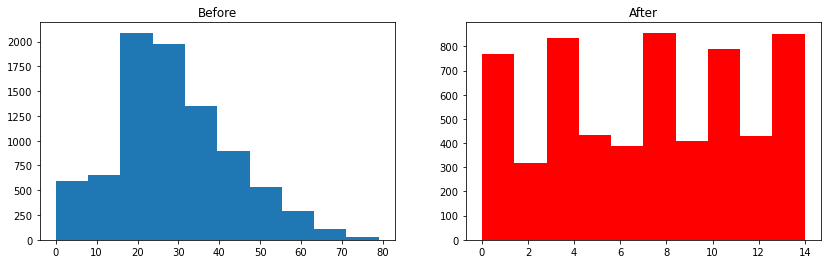

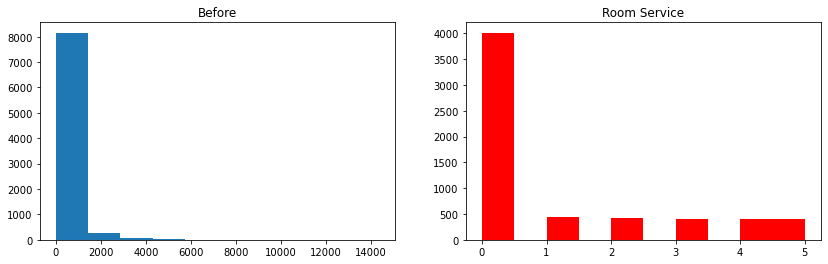

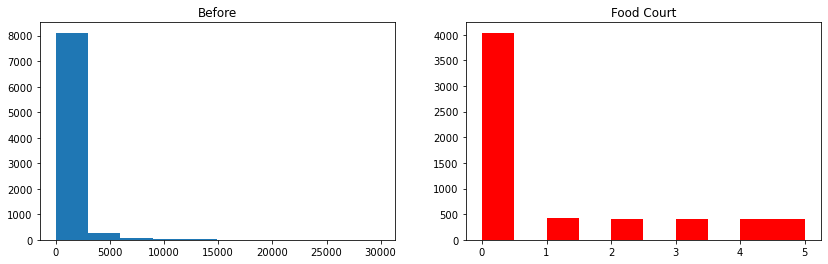

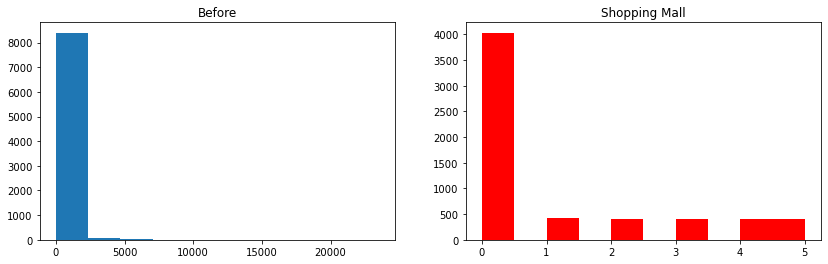

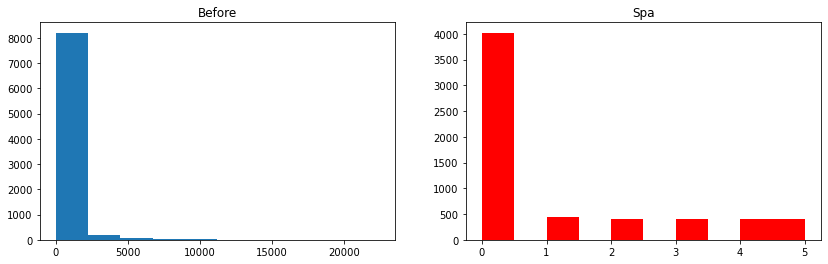

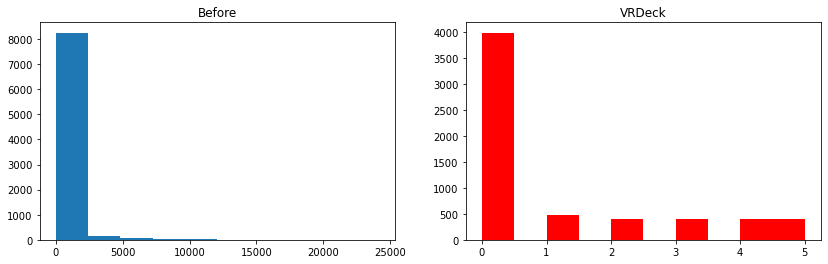

In [80]:
discretize(5,'kmeans')